In diesem Workbook befinden sich alle Grafiken und Untersuchungen von der Integrated Gradients Methode.

### Modell trainieren

100%|██████████| 10/10 [00:16<00:00,  1.61s/it]


Final metrics: 
Validation-Loss:  0.299
Validation-Accuracy:  80.2%
train-Loss:  0.295
train-Accuracy:  81.2%
# Parameters: 199
NeuralNetwork(
  (model): Sequential(
    (0): Linear(in_features=16, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=7, bias=True)
  )
)


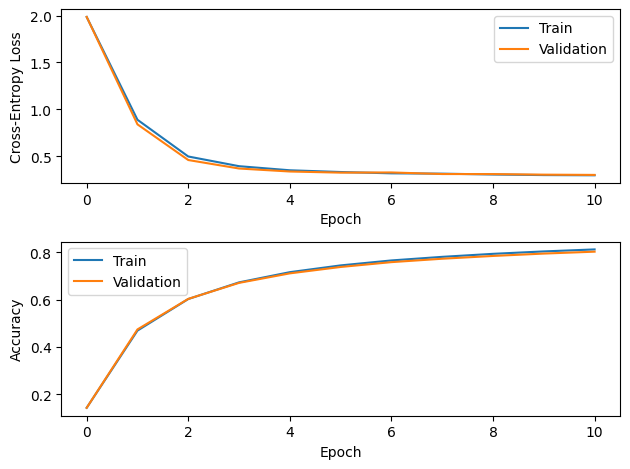

In [1]:
from model.training import train_model_and_visualize
model = train_model_and_visualize([8])

### Instanzweises testen der IG scores

In [2]:
from model.attribution_methods.integrated_gradients import IntegratedGradients
from data.datasets import DryBean
from data.util.utils import DatasetMode

dataset = DryBean(mode=DatasetMode.TEST)

ig = IntegratedGradients(model.get_gradients_with_respect_to_inputs)

x,true_y = dataset[0]
model.eval()
pred_y = model.predict(x)

attribution_score = ig.attribute(x,target_label_index=None,n_steps=500)
print("Attribution Scores: "  + str(attribution_score))
print("Reihenfolge: " + str(attribution_score[0].argsort(descending=True)))

Attribution Scores: (tensor([-0.1033, -0.1716, -0.1565, -0.1553,  0.0070, -0.0072, -0.1057, -0.1858,
        -0.1543,  0.1351,  0.3169,  0.1249,  0.6285,  0.4284,  0.0385,  0.0562]), 3)
Reihenfolge: tensor([12, 13, 10,  9, 11, 15, 14,  4,  5,  0,  6,  8,  3,  2,  1,  7])


c:\Users\leons\programming\PG Attribution Methods\Project_Group_Attribution_Method\model\models.py:55: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return nn.functional.softmax(y).detach()
c:\Users\leons\programming\PG Attribution Methods\Project_Group_Attribution_Method\model\models.py:58: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return nn.functional.softmax(y)


### Testen des Completeness Axioms durch Veränderung der num_steps

100%|██████████| 10/10 [00:16<00:00,  1.62s/it]


Final metrics: 
Validation-Loss:  0.299
Validation-Accuracy:  80.2%
train-Loss:  0.295
train-Accuracy:  81.2%
# Parameters: 199
NeuralNetwork(
  (model): Sequential(
    (0): Linear(in_features=16, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=7, bias=True)
  )
)


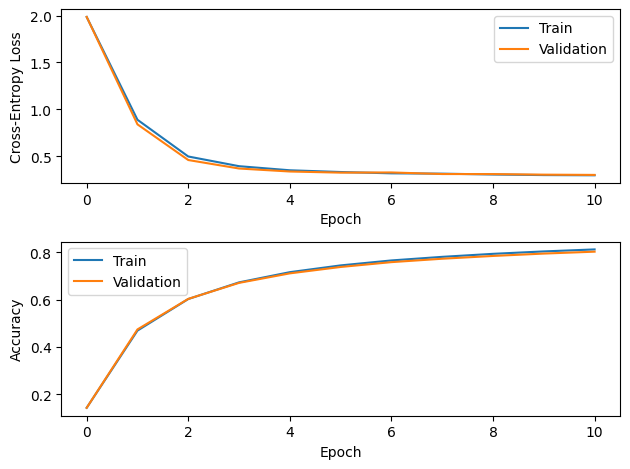

0it [00:00, ?it/s]c:\Users\leons\programming\PG Attribution Methods\Project_Group_Attribution_Method\model\models.py:55: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return nn.functional.softmax(y).detach()
c:\Users\leons\programming\PG Attribution Methods\Project_Group_Attribution_Method\model\models.py:58: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return nn.functional.softmax(y)
1362it [00:10, 126.39it/s]
1362it [00:21, 64.66it/s]
1362it [00:31, 43.41it/s]
1362it [00:40, 33.68it/s]
1362it [00:50, 26.74it/s]
1362it [01:00, 22.48it/s]


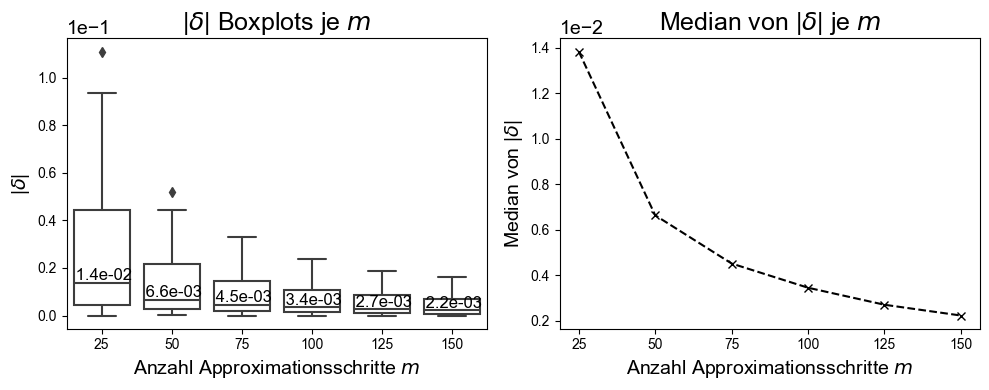

In [1]:
from model.training import train_model_and_visualize
from evaluation import IntegratedGradientsEvaluator
import torch


model = train_model_and_visualize([8])
evaluator = IntegratedGradientsEvaluator(model=model)
evaluator.completeness_deltas_boxplots([25,50,75,100,125,150], baseline=torch.zeros((16)))

testing autobaseline

100%|██████████| 10/10 [00:17<00:00,  1.71s/it]


Final metrics: 
Validation-Loss:  0.299
Validation-Accuracy:  80.2%
train-Loss:  0.295
train-Accuracy:  81.2%
# Parameters: 199
NeuralNetwork(
  (model): Sequential(
    (0): Linear(in_features=16, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=7, bias=True)
  )
)


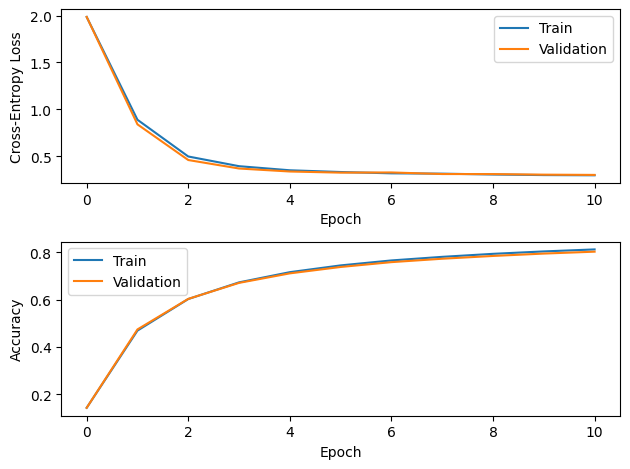

c:\Users\leons\programming\PG Attribution Methods\Project_Group_Attribution_Method\model\models.py:55: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return nn.functional.softmax(y).detach()
  0%|          | 0/300 [00:00<?, ?it/s]c:\Users\leons\programming\PG Attribution Methods\Project_Group_Attribution_Method\model\models.py:58: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return nn.functional.softmax(y)
100%|██████████| 300/300 [00:11<00:00, 27.16it/s]


autobaseline: tensor([ 0.0072,  0.0059,  0.0060,  0.0057,  0.0092, -0.1650,  0.0077,  0.0086,
         0.0079,  0.0079,  0.0049,  0.0071, -0.0595,  0.0090,  0.0076,  0.0061],
       grad_fn=<SqueezeBackward4>)
prediction: tensor([0.2291, 0.0127, 0.1070, 0.1454, 0.1424, 0.0913, 0.2721])


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


L1 Loss L_b:  0.020
L1 Loss L_out:  0.062
tensor(0.0026)
tensor(-0.0005)


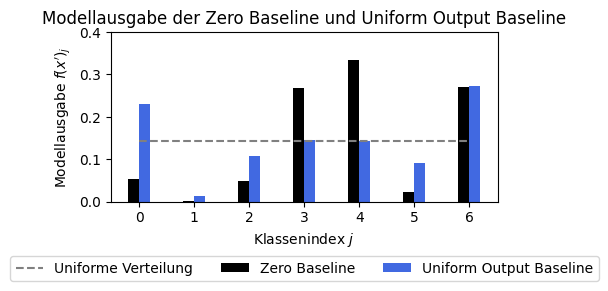

In [1]:
from model.training import train_autobaseline, train_model_and_visualize
from evaluation.utils.visualisation import visualize_baselines_output
import torch
from torch.nn.functional import l1_loss

model = train_model_and_visualize([8], num_epochs=10)

zero_baseline_prediction = model.predict(torch.zeros(16))


uniform_output_baseline = train_autobaseline(model)
uniform_output_baseline_output = model.predict(uniform_output_baseline)

visualize_baselines_output(zero_baseline_prediction,uniform_output_baseline_output)

print(f"L1 Loss L_b: {l1_loss(torch.zeros(16),uniform_output_baseline) : .3f}")
print(f"L1 Loss L_out: {l1_loss(torch.ones(7)*1/7, uniform_output_baseline_output) : .3f}")


Uniform Output Baseline vs Zero Baseline

100%|██████████| 10/10 [00:16<00:00,  1.62s/it]


Final metrics: 
Validation-Loss:  0.299
Validation-Accuracy:  80.2%
train-Loss:  0.295
train-Accuracy:  81.2%
# Parameters: 199
NeuralNetwork(
  (model): Sequential(
    (0): Linear(in_features=16, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=7, bias=True)
  )
)


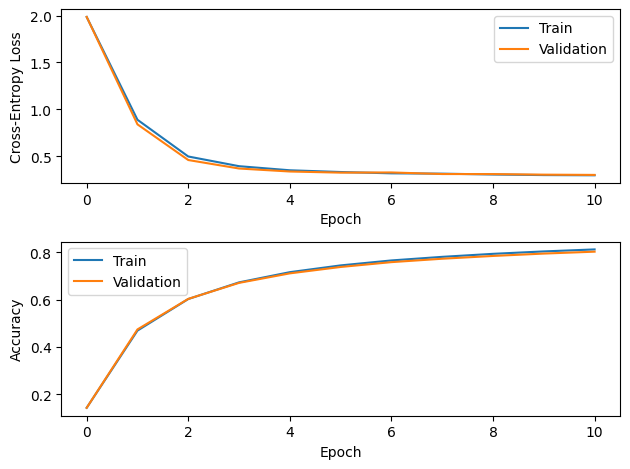

  0%|          | 0/300 [00:00<?, ?it/s]c:\Users\leons\programming\PG Attribution Methods\Project_Group_Attribution_Method\model\models.py:58: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return nn.functional.softmax(y)
100%|██████████| 300/300 [00:10<00:00, 28.09it/s]
c:\Users\leons\programming\PG Attribution Methods\Project_Group_Attribution_Method\model\models.py:55: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return nn.functional.softmax(y).detach()


autobaseline: tensor([ 0.0072,  0.0059,  0.0060,  0.0057,  0.0092, -0.1650,  0.0077,  0.0086,
         0.0079,  0.0079,  0.0049,  0.0071, -0.0595,  0.0090,  0.0076,  0.0061],
       grad_fn=<SqueezeBackward4>)
prediction: tensor([0.2291, 0.0127, 0.1070, 0.1454, 0.1424, 0.0913, 0.2721])


100%|██████████| 1362/1362 [00:03<00:00, 369.89it/s]
c:\Users\leons\programming\PG Attribution Methods\Project_Group_Attribution_Method\evaluation\utils\visualisation.py:147: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  lgd = plt.legend(handles, labels=labels,bbox_to_anchor =(0,-0.28), loc='upper center',ncols=3)
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


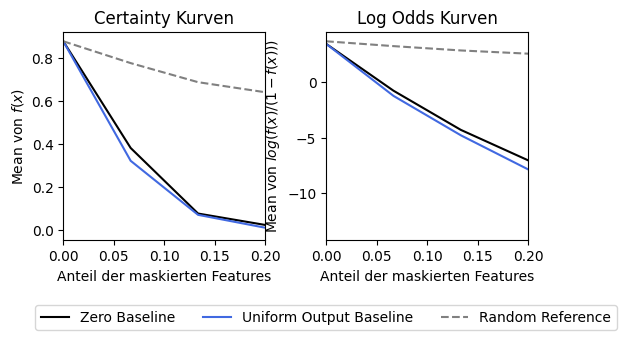

In [1]:
from model.training import train_model_and_visualize, train_autobaseline


from evaluation.attribution_methods_evaluator import AttributionMethodsEvaluator
from data.datasets import DryBean
from data.util.utils import DatasetMode
from model.attribution_methods.integrated_gradients import IntegratedGradients


model = train_model_and_visualize([8])

ig = IntegratedGradients(model.get_gradients_with_respect_to_inputs)
test_dataset = DryBean(DatasetMode.TEST)
am_eval = AttributionMethodsEvaluator(model=model)

uniform_output_baseline = train_autobaseline(model, baseline_error_weight=0.4, num_epochs=300)

am_eval.visualize_comparison_log_odds_of_zero_uniform_output_baseline(uniform_output_baseline, ig.attribute)